##### Required Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# initial parameters
epochs = 70
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

In [3]:
# load image files from the dataset
image_files = [f for f in glob.glob(os.getcwd() + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [4]:
# converting images to arrays and labelling the categories

# Creating Data and labels
data = []
labels = []

for img in image_files[::]:
    image = cv2.imread(img)
    
    try:
        image = cv2.resize(image,(img_dims[0],img_dims[1]))
    except:
        continue
        
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-1] # 'C:\\Users\\anura\\Desktop\\UTKface\\Data\\part1\\14_1_0_20170109204358190.jpg'
    if label[label.index('_')+1] == "1": # Female
        label = 1
    else:
        label = 0 # Male
        
    labels.append([label]) # [[1], [0], [0], ...]

# pre-processing - conberting the image data to array
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# split dataset for training and validation
(trainX, valX, trainY, valY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
valY = to_categorical(valY, num_classes=2)

In [5]:
# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [6]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

In [7]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [8]:
# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

C:\Users\anura\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(valX,valY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

C:\Users\anura\AppData\Local\Temp\ipykernel_3248\2661630514.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/70
423/423 [==============================] - 400s 928ms/step - loss: 0.7304 - accuracy: 0.6302 - val_loss: 0.8009 - val_accuracy: 0.6220
Epoch 2/70
423/423 [==============================] - 393s 929ms/step - loss: 0.5956 - accuracy: 0.6943 - val_loss: 0.6390 - val_accuracy: 0.6791
Epoch 3/70
423/423 [==============================] - 372s 879ms/step - loss: 0.5527 - accuracy: 0.7200 - val_loss: 0.5722 - val_accuracy: 0.7262
Epoch 4/70
423/423 [==============================] - 376s 889ms/step - loss: 0.5194 - accuracy: 0.7351 - val_loss: 0.5441 - val_accuracy: 0.7107
Epoch 5/70
423/423 [==============================] - 388s 916ms/step - loss: 0.4891 - accuracy: 0.7546 - val_loss: 0.4168 - val_accuracy: 0.7957
Epoch 6/70
423/423 [==============================] - 385s 909ms/step - loss: 0.4641 - accuracy: 0.7730 - val_loss: 0.4118 - val_accuracy: 0.7918
Epoch 7/70
423/423 [==============================] - 380s 898ms/step - loss: 0.4511 - accuracy: 0.7794 - val_loss: 0.5045 -

Epoch 57/70
423/423 [==============================] - 378s 894ms/step - loss: 0.2607 - accuracy: 0.8837 - val_loss: 0.2976 - val_accuracy: 0.8724
Epoch 58/70
423/423 [==============================] - 376s 889ms/step - loss: 0.2615 - accuracy: 0.8846 - val_loss: 0.2575 - val_accuracy: 0.8892
Epoch 59/70
423/423 [==============================] - 375s 885ms/step - loss: 0.2600 - accuracy: 0.8866 - val_loss: 0.2865 - val_accuracy: 0.8750
Epoch 60/70
423/423 [==============================] - 375s 885ms/step - loss: 0.2551 - accuracy: 0.8882 - val_loss: 0.3318 - val_accuracy: 0.8666
Epoch 61/70
423/423 [==============================] - 377s 891ms/step - loss: 0.2625 - accuracy: 0.8848 - val_loss: 0.2725 - val_accuracy: 0.8839
Epoch 62/70
423/423 [==============================] - 383s 905ms/step - loss: 0.2579 - accuracy: 0.8868 - val_loss: 0.2659 - val_accuracy: 0.8796
Epoch 63/70
423/423 [==============================] - 377s 890ms/step - loss: 0.2545 - accuracy: 0.8894 - val_loss: 0

In [10]:
# save the model to disk
model.save(os.getcwd()+'/saved_model/gender_model')

INFO:tensorflow:Assets written to: C:\Users\anura\Desktop\UTKface/saved_model/gender_model\assets


INFO:tensorflow:Assets written to: C:\Users\anura\Desktop\UTKface/saved_model/gender_model\assets


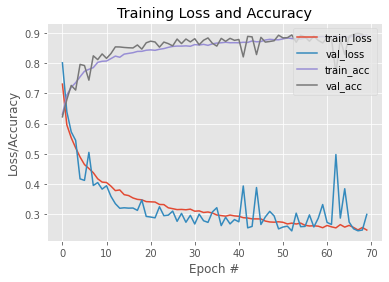

In [11]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
